<a href="https://colab.research.google.com/github/SteveR-Ncl/maths-colab-notebooks/blob/main/Maths_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graphs

In [3]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import graphviz


## Sketch a directed graph:

$ N=(1,2,3,4,5) $

$ E=\{(1,2) ,(1,3),(3,3),(4,2),(5,4),(4,3)\} $



Set up node options first

In [5]:
options = {
    "font_size": 16,
    "node_size": 600,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 2,

}

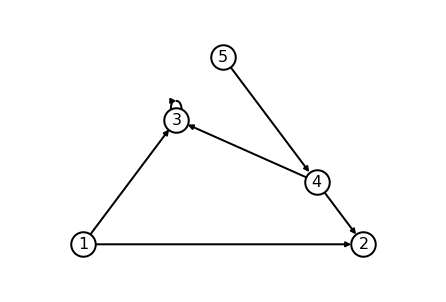

In [6]:
G=nx.DiGraph()
G.add_edges_from([(1,2),(1,3),(3,3),(4,2),(5,4),(4,3)])
nx.draw_planar (G, with_labels=True, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

# From https://networkx.org/documentation/stable/auto_examples/basic/plot_simple_graph.html

In [21]:
print("Order is", G.order())

from tabulate import tabulate
print(tabulate(G.degree,headers = ["Node","Degree"]))

Order is 4
  Node    Degree
------  --------
     2         2
     1         3
     3         4
     4         1


## Paths, Circuits, Cycles

A **path** in a directed graph $G=(N,E)$ is a sequence of nodes $n_{0}n_{1}\dots n_{k}$ such that $(n_{i},n_{i+1}) \in E$ is an edge in the directed graph $G$ for each $i=0,\ldots,k-1$

* You can only go in the direction given by the edges
* A path containing $k$ nodes has length $k-1$
* A node by itself is a path of length 0

For this graph:

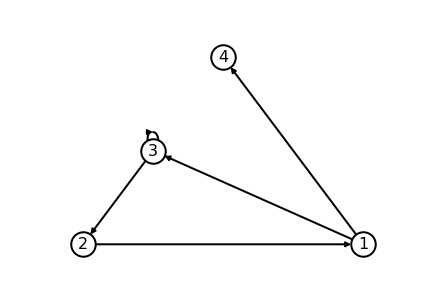

In [17]:
G=nx.DiGraph()
G.add_edges_from([(2,1),(3,2),(3,3),(1,3),(1,4)])
nx.draw_planar (G, with_labels=True, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [18]:
# networkx function is_simple_path actually identifies a path with no repeating nodes
nx.is_simple_path(G,[1,3,3,3,2,1,4])

False

In [15]:
# so we write a version of is_simple_path which doesn't check for repeats
from networkx.utils import pairwise

def is_path(G, nodes):
    # The empty list is not a valid path. Could also return
    # NetworkXPointlessConcept here.
    if len(nodes) == 0:
        return False
    # If the list is a single node, just check that the node is actually
    # in the graph.
    if len(nodes) == 1:
        return nodes[0] in G
    # Test that each adjacent pair of nodes is adjacent.
    return all(v in G[u] for u, v in pairwise(nodes))

In [22]:
# Try again with new function 
print(is_path(G,[1,3,3,3,2,1,4])) # valid
print(is_path(G,[3,2,1,3,2,1])) # valid
print(is_path(G,[2,1,3,3,2,3,2])) # not valid

True
True
False


A **circuit** in a directed graph $G=(N,E)$ is a path $n_{0}n_{1}\dots n_{k}$ whose start and end nodes are the same, i.e. $n_{0} = n_{k}$

* So a **circuit** is a path where you end up where you started


In [31]:
# use the previous is_path function to define is_circuit
def is_circuit(G, nodes):
  return is_path(G, nodes) and nodes[0] == nodes[len(nodes) - 1]

In [32]:
print(is_circuit(G,[2,1,3,3,3,2]))  # valid
print(is_circuit(G,[2,1,3,2,1])) # not valid

True
False


A **cycle** in a directed graph $G=(N,E)$ is a circuit where you don't visit the same node twice

* Every cycle is also a circuit
* Cycle → Circuit → Path

In [36]:
# a cycle is a circuit that's also a simple path.. except that the first and last nodes are the same!
def is_cycle(G, nodes):
  return len(set(nodes)) == len(nodes) - 1 and is_circuit(G, nodes) # means there is exactly 1 duplicate, and the duplicate is the first/last node

In [37]:
print(is_cycle(G,[2,1,3,2])) # yes
print(is_cycle(G,[2,1,3,3,2])) # no
print(is_cycle(G,[2,1,3,2,1,3,2])) # no

True
False
False


# Trees

Using graphviz 


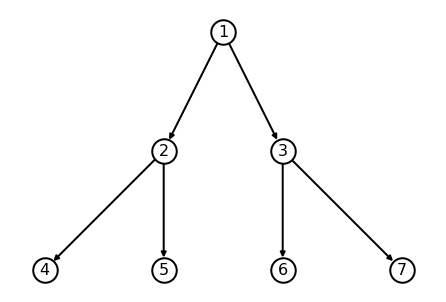

In [ ]:
from networkx.drawing.nx_agraph import graphviz_layout
G = nx.DiGraph()
G.add_edges_from([(1,2),(1,3),(2,4),(2,5),(3,6),(3,7)])
pos = graphviz_layout(G,prog='dot')
nx.draw(G, pos=pos, with_labels=True, **options)